In [5]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

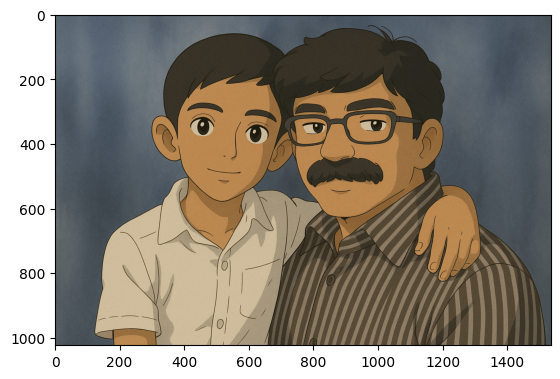

In [9]:
full = cv.imread('photos/img2.png')
full = cv.cvtColor(full , cv.COLOR_BGR2RGB)
plt.imshow(full)

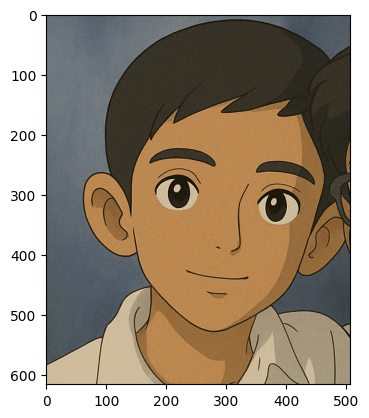

In [13]:
face = cv.imread('photos/face.png')
face = cv.cvtColor(face , cv.COLOR_BGR2RGB)
plt.imshow(face)

In [18]:
methods = ['cv.TM_CCOEFF' , 'cv.TM_CCOEFF_NORMED' , 'cv.TM_CCORR' , 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED' , 'cv.TM_SQDIFF_NORMED']

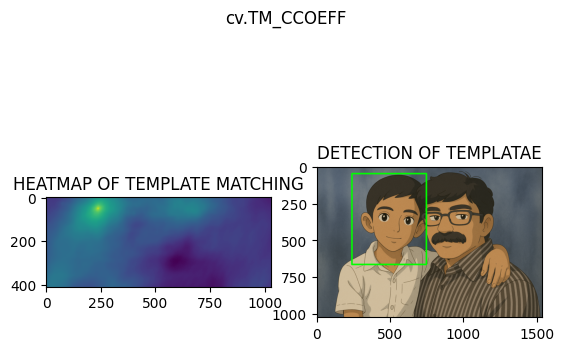

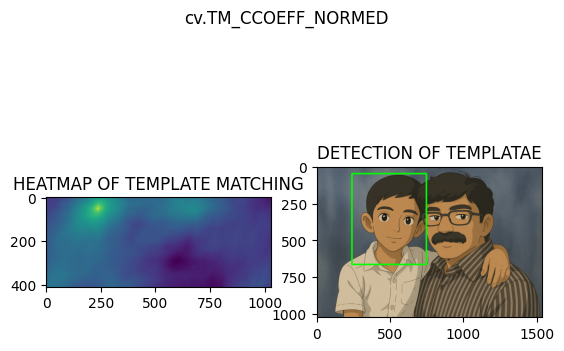

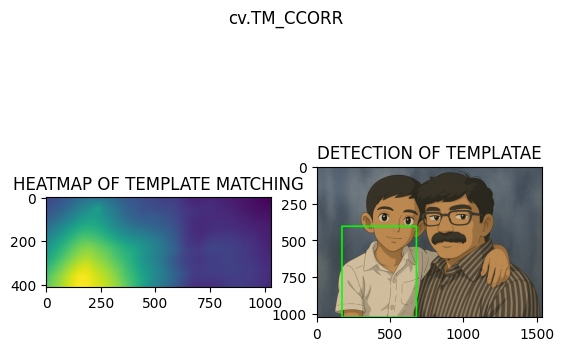

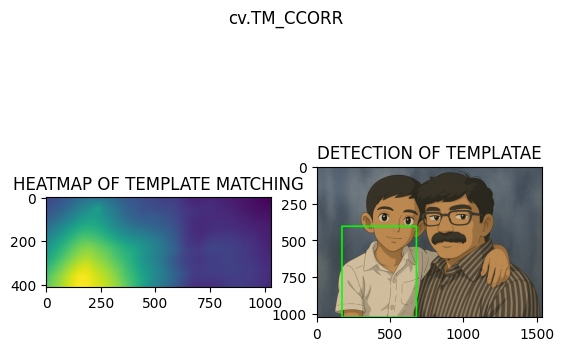

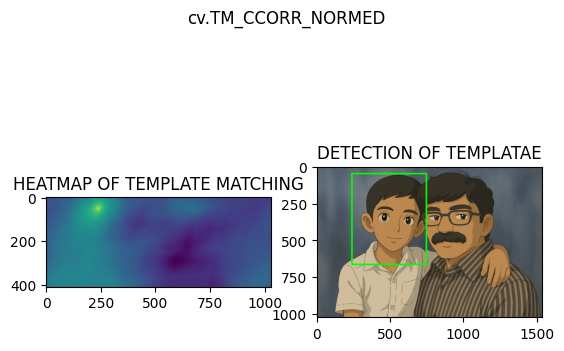

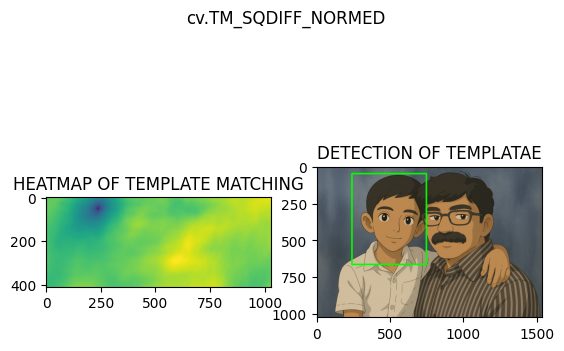

In [33]:
for m in methods:

    full_copy = full.copy()
    method = eval(m)

    #Template matching
    res = cv.matchTemplate(full_copy ,face, method)
    min_val , max_val , min_loc , max_loc = cv.minMaxLoc(res)

    if method in [cv.TM_SQDIFF , cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    height , width,  channels = face.shape
    bottom_right = (top_left[0] + width , top_left[1]+height)

    cv.rectangle(full_copy , top_left , bottom_right , (0,255,0) , 10)

    #plot and show images

    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("DETECTION OF TEMPLATAE")
    plt.suptitle(m)
    plt.show()